In [16]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_parquet("./data/green_tripdata_2021-01.parquet")

In [8]:
df = df[df.trip_type == 2].reset_index(drop=True)

In [10]:
# df.head()
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [13]:
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']

In [15]:
df['duration'] = df['duration'].apply(lambda x: x.total_seconds() / 60)

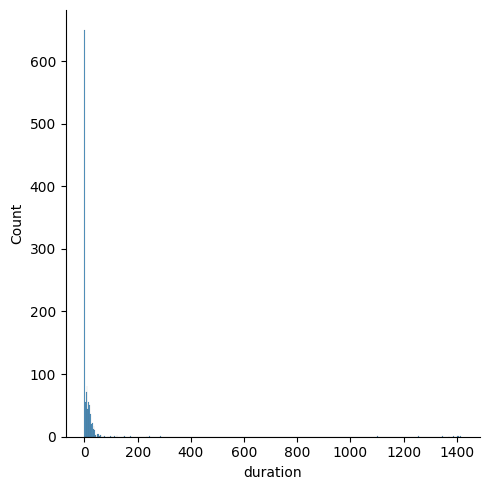

In [17]:
sns.displot(df.duration)

In [18]:
df.duration.describe()

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
25%         0.100000
50%         1.666667
75%        14.216667
max      1416.100000
Name: duration, dtype: float64

In [19]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])
# The 95th percentile is the value below which 95% of the data falls.

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
50%         1.666667
95%        35.604167
98%        59.339333
99%       149.837833
max      1416.100000
Name: duration, dtype: float64

In [20]:
df[(df.duration >=1) & (df.duration <= 60)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
2,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.0,0.0,None,0.3,13.3,2.0,2.0,0.0,19.766667
5,2,2021-01-01 01:54:51,2021-01-01 02:15:35,N,5.0,74,94,1.0,5.82,18.0,...,0.0,0.0,0.0,None,0.3,18.3,2.0,2.0,0.0,20.733333
6,2,2021-01-01 02:42:49,2021-01-01 02:50:59,N,5.0,136,241,1.0,0.57,9.0,...,0.0,0.0,0.0,None,0.3,9.3,2.0,2.0,0.0,8.166667
8,2,2021-01-01 04:52:02,2021-01-01 05:05:01,N,5.0,247,75,1.0,3.43,15.0,...,0.0,0.0,0.0,None,0.3,15.3,2.0,2.0,0.0,12.983333
10,2,2021-01-01 05:52:43,2021-01-01 05:58:02,N,5.0,7,7,1.0,0.65,50.0,...,0.0,7.0,0.0,None,0.3,57.3,1.0,2.0,0.0,5.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2,2021-01-31 18:42:52,2021-01-31 19:08:44,N,5.0,69,213,2.0,5.40,16.0,...,0.0,0.0,0.0,None,0.3,16.3,2.0,2.0,0.0,25.866667
1232,1,2021-01-31 19:32:22,2021-01-31 19:50:16,N,5.0,82,129,2.0,2.40,0.0,...,0.0,0.0,0.0,None,0.0,0.0,2.0,2.0,0.0,17.900000
1233,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.0,0.0,None,0.3,10.3,2.0,2.0,0.0,9.450000
1234,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.0,0.0,None,0.3,30.3,2.0,2.0,0.0,35.033333
